In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
import pandas as pd

In [ ]:
cf_name = "IDM"
param_names = ["s0", "v0", "T", "omega", "d", "delta"]

df_param_merge = pd.read_pickle(r"E:\PyProject\car-following-model-test\tests\data\df_param_hysteresis_merge" + f"_{cf_name}.pkl")

# 处理后轨迹数据描述性统计

In [28]:
print(f'RMSE(dec_vs): {np.sqrt(np.mean(df_param_merge["dec_vs"] - df_param_merge["ori_dec_vs"]) ** 2)}')
print(f'RMSE(acc_vs): {np.sqrt(np.mean(df_param_merge["acc_vs"] - df_param_merge["ori_acc_vs"]) ** 2)}')
print(f'RMSE(total_vs): {np.sqrt(np.mean(df_param_merge["total_vs"] - df_param_merge["ori_total_vs"]) ** 2)}')

RMSE(dec_vs): 0.48421648544781215
RMSE(acc_vs): 0.6183098101637428
RMSE(total_vs): 1.1120006593677512


In [14]:
pd.options.display.precision = 2

df_param_merge[["dec_vs", "ori_dec_vs", "acc_vs", "ori_acc_vs", "total_vs",  "ori_total_vs"]].describe().loc[["mean", "std", "min", "max"]].T

,mean,std,min,max
dec_vs,0.97,1.96,-10.11,16.32
ori_dec_vs,1.46,2.35,-11.28,16.71
acc_vs,3.49,3.58,-3.48,22.51
ori_acc_vs,4.12,3.91,-4.90,22.30
total_vs,4.47,4.77,-10.51,31.67
ori_total_vs,5.58,5.12,-11.07,36.93


## Spearman Correlation Coefficient

In [ ]:
from scipy.stats import spearmanr

# 创建一个mask，隐藏上三角的非对角线部分
# mask = np.triu(np.ones_like(corr, dtype=bool))
df = df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs"]]
df.rename(columns={"dec_vs": "VSM\n(dec)", "acc_vs": "VSM\n(acc)", "total_vs": "VSM\n(full)"}, inplace=True)
df.rename(columns={"s0": "$s_0$", "v0": "$v_0$", "T": "$T$", "omega": "$\omega$", "d": "$d$", "delta": "$\delta$"},
          inplace=True)

sns.reset_defaults()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def cm2inch(x, y):
    return x / 2.54, y / 2.54


fontsize = 6  # 7磅/pt/point
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        "font.family": 'serif',
        "font.size": fontsize,
        "font.serif": ['Times New Roman'],
    }
)
fontdict = {'weight': 'bold', 'size': fontsize, 'family': 'SimHei'}

df_coor = df.corr(method="spearman")  # 相关性结果
# df_coor = df.corr(method="pearson") # 相关性结果

mm = 1 / 25.4  # mm转inch
_width = 70 * mm  # 图片宽度英寸
_ratio = 6 / 7  # 图片长宽比
figsize = (_width, _width * _ratio)

fig = plt.figure(figsize=figsize)
ax1 = plt.gca()

print(df_coor)
#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask) - 1) * (-1)
mask = np.rot90(mask, k=-1)

ax1.tick_params(axis='both', length=0)

# #计算相关性显著性并显示
rlist = []
plist = []
df_np = df
print(df_np)
for i in df_np.columns:
    for j in df_np.columns:
        res = spearmanr(df_np[i], df_np[j])
        rlist.append(res.statistic)
        plist.append(res.pvalue)

rarr = np.asarray(rlist).reshape(df_coor.shape[0], df_coor.shape[0])
parr = np.asarray(plist).reshape(df_coor.shape[0], df_coor.shape[0])
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()
print(xlist, ylist)

im1 = sns.heatmap(rarr, annot=True, cmap="coolwarm"
                  , mask=mask  #构造mask，去除重复数据显示
                  , vmax=1, vmin=-1
                  , fmt='.2f', ax=ax1)

ax1.set_xticklabels(df_coor.columns)
ax1.set_yticklabels(df_coor.columns)

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():  # 行
    for n in ax1.get_yticks():  # 列
        # if int(m) == 0 and int(n) == 0:
        #     ax1.text(0, 1, '****',ha = 'center',color = 'k')
        # print([int(m),int(n)])
        pv = (parr[int(m), int(n)])
        # rv = (rarr[int(m),int(n)])
        if mask2[int(m), int(n)] < 1.:
            # if abs(rv) > 0.5:
            #     if  pv< 0.05 and pv>= 0.01:
            #         ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'white')
            #     if  pv< 0.01 and pv>= 0.001:
            #         ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'white')
            #     if  pv< 0.001:
            #         print([int(m),int(n)])
            #         ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'white')
            # else:
            if pv < 0.05 and pv >= 0.01:
                ax1.text(n + widthx, m + widthy, '*', ha='center', color='k', fontsize=fontsize - 2)
            elif pv < 0.01 and pv >= 0.001:
                ax1.text(n + widthx, m + widthy, '**', ha='center', color='k', fontsize=fontsize - 2)
            elif pv < 0.001:
                ax1.text(n + widthx, m + widthy, '***', ha='center', color='k', fontsize=fontsize - 2)

fig.subplots_adjust(wspace=0.5, bottom=0.1, top=0.95, right=0.98, left=0.10)
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\param_corr" + f"_{cf_name}.tif", dpi=500,
            pil_kwargs={"compression": "tiff_lzw"})
fig

# KS检验

In [9]:
from scipy.stats import ks_2samp

print(ks_2samp(df_param_merge["dec_vs"], df_param_merge["ori_dec_vs"]))
print(ks_2samp(df_param_merge["acc_vs"], df_param_merge["ori_acc_vs"]))
print(ks_2samp(df_param_merge["total_vs"], df_param_merge["ori_total_vs"]))

KstestResult(statistic=0.12976022566995768, pvalue=1.2749276499677215e-05, statistic_location=1.3224215893091922, statistic_sign=1)
KstestResult(statistic=0.12411847672778561, pvalue=3.536676200672202e-05, statistic_location=3.3042599355062303, statistic_sign=1)
KstestResult(statistic=0.12129760225669958, pvalue=5.790129241407414e-05, statistic_location=3.420354991429546, statistic_sign=1)


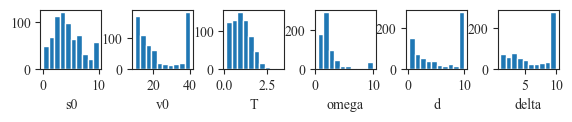

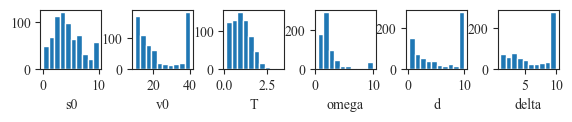

In [15]:
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font',family='Times New Roman')
mm = 1 / 25.4  # mm转inch
fontsize = 10  # 7磅/pt/point
_width = 70 * 2 * mm  # 图片宽度英寸
_ratio = 3 / 14  # 图片长宽比
figsize = (_width, _width * _ratio)

fig, axes = plt.subplots(1, len(param_names), figsize=figsize)
# fig.suptitle(cf_name, fontsize=16)
for i, name in enumerate(param_names):
    axes[i].set_xlabel(name, fontsize=fontsize)
    axes[i].hist(df_param_merge[name])
    # axes[i].grid()
fig.subplots_adjust(wspace=0.5, bottom=0.4, top=0.9, right=0.99, left=0.05)
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\clb_param_hist" + f"_{cf_name}.tif", dpi=500, pil_kwargs={"compression": "tiff_lzw"})
fig

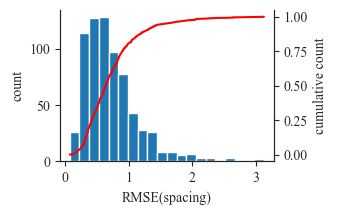

In [11]:
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font',family='Times New Roman')
mm = 1 / 25.4  # mm转inch
fontsize = 10  # 7磅/pt/point
_width = 70 * mm  # 图片宽度英寸
_ratio = 5 / 7  # 图片长宽比
figsize = (_width, _width * _ratio)

fig, ax = plt.subplots(1, 1, figsize=figsize)
df_param_merge[["ObjV"]].hist(ax=ax, bins=20)
ax.set_title(None)

ax.set_xlabel("RMSE(spacing)", fontsize=fontsize)
ax.set_ylabel("count", fontsize=fontsize)
ax.grid(False)

ax_ = ax.twinx()
ax_.set_ylabel("cumulative count", fontsize=fontsize)
ax_.plot(df_param_merge.sort_values(by="ObjV")["ObjV"], np.arange(len(df_param_merge)) / len(df_param_merge), color="red")

ax.spines['top'].set_visible(False)
ax_.spines['top'].set_visible(False)
fig.savefig(fr"E:\PyProject\car-following-model-test\tests\data\clb_RMSE_hist_{cf_name}.tif", dpi=500, pil_kwargs={"compression": "tiff_lzw"})

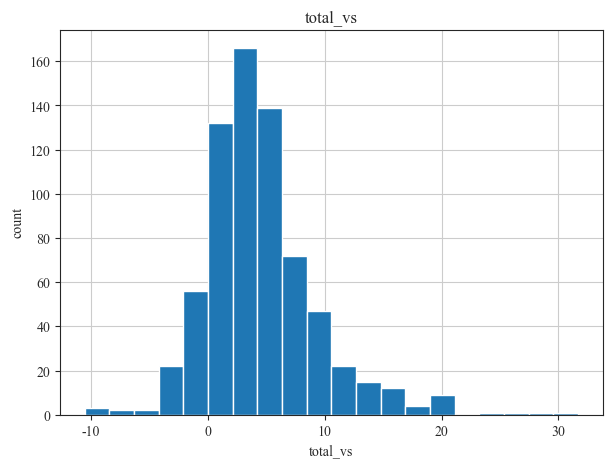

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

df_param_merge[["total_vs"]].hist(ax=ax, bins=20)

ax.set_xlabel("total_vs")
ax.set_ylabel("count")

fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\ori_full_vs_hist.png")

In [13]:
len(df_param_merge[df_param_merge["total_vs"] > 0]) / len(df_param_merge)

0.8787023977433004

KeyError: 6614

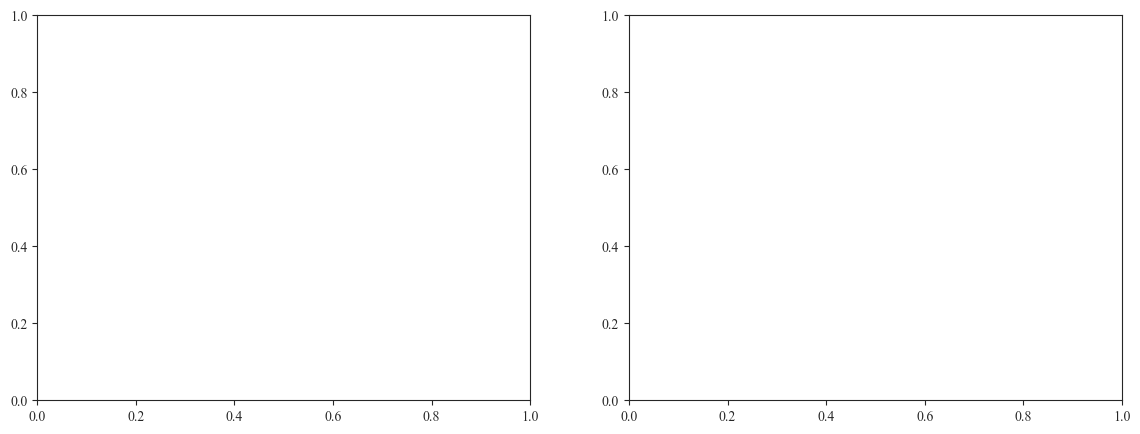

In [14]:
import random
import numpy as np
from trasim_simplified.core.kinematics.cfm import get_cf_equilibrium

cf_e = get_cf_equilibrium(cf_name)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig: plt.Figure = fig
axes: list[plt.Axes] = axes

# id_ = random.choice(ids)
id_ = 6614
# pos = np.where(np.array(id_s) == id_)[0][0]

full_v = np.concatenate([df_clb["dec"][id_][TI.v], df_clb["acc"][id_][TI.v]])
full_lv = np.concatenate([df_clb["dec"][id_][Prefix.leader + TI.v], df_clb["acc"][id_][Prefix.leader + TI.v]])
full_lx = np.concatenate([df_clb["dec"][id_][Prefix.leader + TI.x], df_clb["acc"][id_][Prefix.leader + TI.x]])
full_x = np.concatenate([df_clb["dec"][id_][TI.x], df_clb["acc"][id_][TI.x]])
l_length = df_clb["dec"][id_][Prefix.leader + TI.v_Length].iloc[0]
time = np.arange(len(full_v)) * 0.1

plt.sca(axes[0])
plt.cla()
plt.xlabel("v")
plt.ylabel("s")
# plt.plot(df_clb["dec"][id_][TI.v], df_clb["dec"][id_][Prefix.leader + TI.x] - df_clb["dec"][id_][TI.x] - l_length, label=f"dec: {id_}, vs: {df_param_merge[df_param_merge[TI.Pair_ID] == id_]['dec_vs'].iloc[0]:.2f}")
# plt.plot(df_clb["acc"][id_][TI.v], df_clb["acc"][id_][Prefix.leader + TI.x] - df_clb["acc"][id_][TI.x] - l_length, label=f"acc: {id_}, vs: {df_param_merge[df_param_merge[TI.Pair_ID] == id_]['acc_vs'].iloc[0]:.2f}")
plt.plot(df_ori["dec"][id_][TI.v], df_ori["dec"][id_][Prefix.leader + TI.x] - df_ori["dec"][id_][TI.x] - l_length)
plt.plot(df_ori["acc"][id_][TI.v], df_ori["acc"][id_][Prefix.leader + TI.x] - df_ori["acc"][id_][TI.x] - l_length)

box = plt.ylim()

# gap = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_v)
# plt.plot(full_v, gap, linestyle=":", color="black", label="e_gap_v")

# gap_lv = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_lv)
# plt.plot(full_lv, gap_lv, linestyle="--", color="black", label="e_gap_lv")

plt.ylim(box)

# plt.legend()
plt.title(f"{cf_name}-pair_ID: {id_}")

plt.sca(axes[1])
plt.cla()
plt.xlabel("t")
plt.ylabel("x")
plt.plot(time, full_lx, label="leader_x")
plt.plot(time, np.concatenate([df_ori["dec"][id_][TI.x], df_ori["acc"][id_][TI.x]]), label="ori_follower_x", linestyle="--")
plt.plot(time, full_x, label="follower_x")
# e_gap_own_v = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_v)
# plt.plot(time, full_lx - e_gap_own_v - l_length, linestyle=":", color="black", label="e_gap_v")
# e_gap_lv = cf_e(**df_param_merge[df_param_merge[TI.Pair_ID] == id_][param_names].iloc[0].to_dict(), speed=full_lv)
# plt.plot(time, full_lx - e_gap_lv - l_length, linestyle="--", color="black", label="e_gap_lv")
plt.legend()

# plt.show()
plt.savefig(r"E:\PyProject\car-following-model-test\tests\data\traj" + f"_{cf_name}.png")

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_23652\2324670588.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1["species"] = "clb"


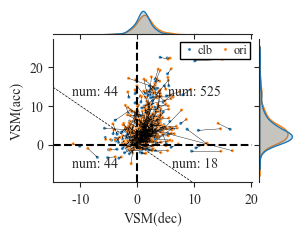

In [15]:
from seaborn import histplot
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font',family='Times New Roman')
mm = 1 / 25.4  # mm转inch
fontsize = 10  # 7磅/pt/point
_width = 70 * mm  # 图片宽度英寸
_ratio = 5 / 7  # 图片长宽比
figsize = (_width, _width * _ratio)

temp1 = df_param_merge[["dec_vs", "acc_vs"]]
temp1["species"] = "clb"
temp2 = df_param_merge[["ori_dec_vs", "ori_acc_vs"]].rename(columns={"ori_dec_vs": "dec_vs", "ori_acc_vs": "acc_vs"})
temp2["species"] = "ori"
temp = pd.concat([temp1, temp2], axis=0).reset_index()

JointGrid = sns.jointplot(
    data=temp,
    x="dec_vs", y="acc_vs", hue="species",
    kind="scatter",
    # xlim=(-20, 50),
    # ylim=(-50, 30),
    s=5,
)
# # 将散点图x轴显示范围限制在[-20, 50]，并且设置坐标轴刻度
# JointGrid.ax_joint.set_xlim(-20, 50)
# # 将散点图y轴显示范围限制在[-50, 30]，并且设置坐标轴刻度
# JointGrid.ax_joint.set_ylim(-50, 30)
ax = JointGrid.ax_joint
ax.quiver(df_param_merge["ori_dec_vs"], df_param_merge["ori_acc_vs"], df_param_merge["dec_vs"] - df_param_merge["ori_dec_vs"], df_param_merge["acc_vs"] - df_param_merge["ori_acc_vs"], angles="xy", scale_units="xy", scale=1, width=0.002)
ax.set_xlabel("VSM(dec)", fontsize=10)
ax.set_ylabel("VSM(acc)", fontsize=10)
# ax.set_title(cf_name)
# 绘制x=0以及y=0的直线
ax.axvline(0, c="black", linestyle="--")
ax.axhline(0, c="black", linestyle="--")
# 在分隔开的四个分区域中，在区域中心位置标注区域名称以及区域内的样本数量
w_l = ax.get_xlim()[0] / 2
w_r = ax.get_xlim()[1] / 2
h_u = ax.get_ylim()[1] / 2
h_d = ax.get_ylim()[0] / 2

ax.text(w_l, h_d, f"num: {len(df_param_merge[(df_param_merge['dec_vs'] < 0) & (df_param_merge['acc_vs'] < 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
temp = df_param_merge[(df_param_merge['dec_vs'] < 0) & (df_param_merge['acc_vs'] < 0)]
temp1 = temp["total_vs"]
ax.text(w_l, h_u, f"num: {len(temp)}", fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.text(w_r, h_d, f"num: {len(df_param_merge[(df_param_merge['dec_vs'] > 0) & (df_param_merge['acc_vs'] < 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')
ax.text(w_r, h_u, f"num: {len(df_param_merge[(df_param_merge['dec_vs'] > 0) & (df_param_merge['acc_vs'] > 0)])}", fontsize=10, horizontalalignment='center', verticalalignment='center')

ax.legend(fontsize=fontsize - 1, frameon=True, framealpha=1, edgecolor="k", ncol=2, fancybox=False, shadow=False, borderpad=0.2, labelspacing=0.2, handletextpad=0.2, handlelength=1, columnspacing=0.5, borderaxespad=0.2)

# 获取图幅的角点
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()

x0_ = min(-x0, y1)
x1_ = min(x1, -y0)
ax.plot([-x0_, x1_], [x0_, -x1_], linestyle="--", color="black", linewidth=0.5)
ax.set_xlim(x0, x1)
ax.set_ylim(y0, y1)

# 将图片尺寸设置为7*5
JointGrid.fig.set_size_inches(* figsize)
JointGrid.savefig(r"E:\PyProject\car-following-model-test\tests\data\dec_acc_vs" + f"_{cf_name}.tif", dpi=500, pil_kwargs={"compression": "tiff_lzw"})

# 不同减加速迟滞强度区间的参数变化趋势探究

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_1780\2284055974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_neg_acc_neg["hys_type"] = "dec_neg_acc_neg"
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_1780\2284055974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_neg_acc_pos["hys_type"] = "dec_neg_acc_pos"
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_1780\2284055974.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

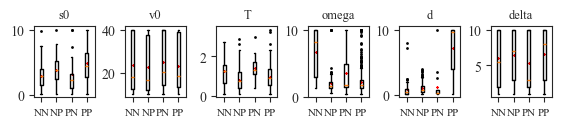

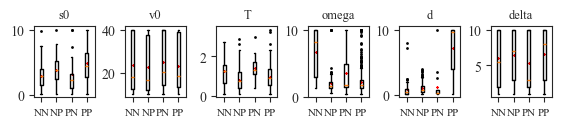

In [16]:
dec_neg_acc_neg = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0)]
dec_neg_acc_pos = df_param_merge[(df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0)]
dec_pos_acc_neg = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0)]
dec_pos_acc_pos = df_param_merge[(df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0)]

dec_neg_acc_neg["hys_type"] = "dec_neg_acc_neg"
dec_neg_acc_pos["hys_type"] = "dec_neg_acc_pos"
dec_pos_acc_neg["hys_type"] = "dec_pos_acc_neg"
dec_pos_acc_pos["hys_type"] = "dec_pos_acc_pos"
df_param_merge["hys_type"] = None
df_param_merge.loc[dec_neg_acc_neg.index, "hys_type"] = "dec_neg_acc_neg"
df_param_merge.loc[dec_neg_acc_pos.index, "hys_type"] = "dec_neg_acc_pos"
df_param_merge.loc[dec_pos_acc_neg.index, "hys_type"] = "dec_pos_acc_neg"
df_param_merge.loc[dec_pos_acc_pos.index, "hys_type"] = "dec_pos_acc_pos"

import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
plt.rc('font',family='Times New Roman')
mm = 1 / 25.4  # mm转inch
fontsize = 10  # 7磅/pt/point
_width = 70 * 2 * mm  # 图片宽度英寸
_ratio = 3 / 14  # 图片长宽比
figsize = (_width, _width * _ratio)

ax_num = len(param_names)
fig, axes = plt.subplots(1, ax_num, figsize=figsize)

for i, name in enumerate(param_names):
    axes[i].boxplot([dec_neg_acc_neg[name], dec_neg_acc_pos[name], dec_pos_acc_neg[name], dec_pos_acc_pos[name]], showfliers=True, widths=0.2, flierprops=dict(marker='o', markersize=1, linestyle='none'))
    axes[i].scatter([1, 2, 3, 4], [dec_neg_acc_neg[name].mean(), dec_neg_acc_pos[name].mean(), dec_pos_acc_neg[name].mean(), dec_pos_acc_pos[name].mean()], c="r", s=1, marker="x")
    axes[i].set_title(name, fontsize=fontsize - 1)
    axes[i].set_xticklabels(["NN", "NP", "PN", "PP"], fontsize=fontsize - 2)

fig.subplots_adjust(wspace=0.5, bottom=0.2, top=0.8, right=0.99, left=0.05)
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\type_param_boxplot" + f"_{cf_name}.tif", dpi=500, pil_kwargs={"compression": "tiff_lzw"})
fig

In [17]:
NN = dec_neg_acc_neg[param_names].mean()
NP = dec_neg_acc_pos[param_names].mean()
PN = dec_pos_acc_neg[param_names].mean()
PP = dec_pos_acc_pos[param_names].mean()
median_param = pd.DataFrame([PP, PN, NP, NN], index=["PP", "PN", "NP", "NN"])
median_param.to_pickle(r"E:\PyProject\car-following-model-test\tests\data\median_param_by_hys_type" + f"_{cf_name}.pkl")
median_param

,s0,v0,T,omega,d,delta
PP,4.82,22.65,0.97,2.19,7.13,6.57
PN,3.12,24.76,1.41,3.53,1.17,5.33
NP,3.85,22.50,0.83,2.06,1.04,6.53
NN,2.90,23.44,1.23,6.71,0.92,6.05


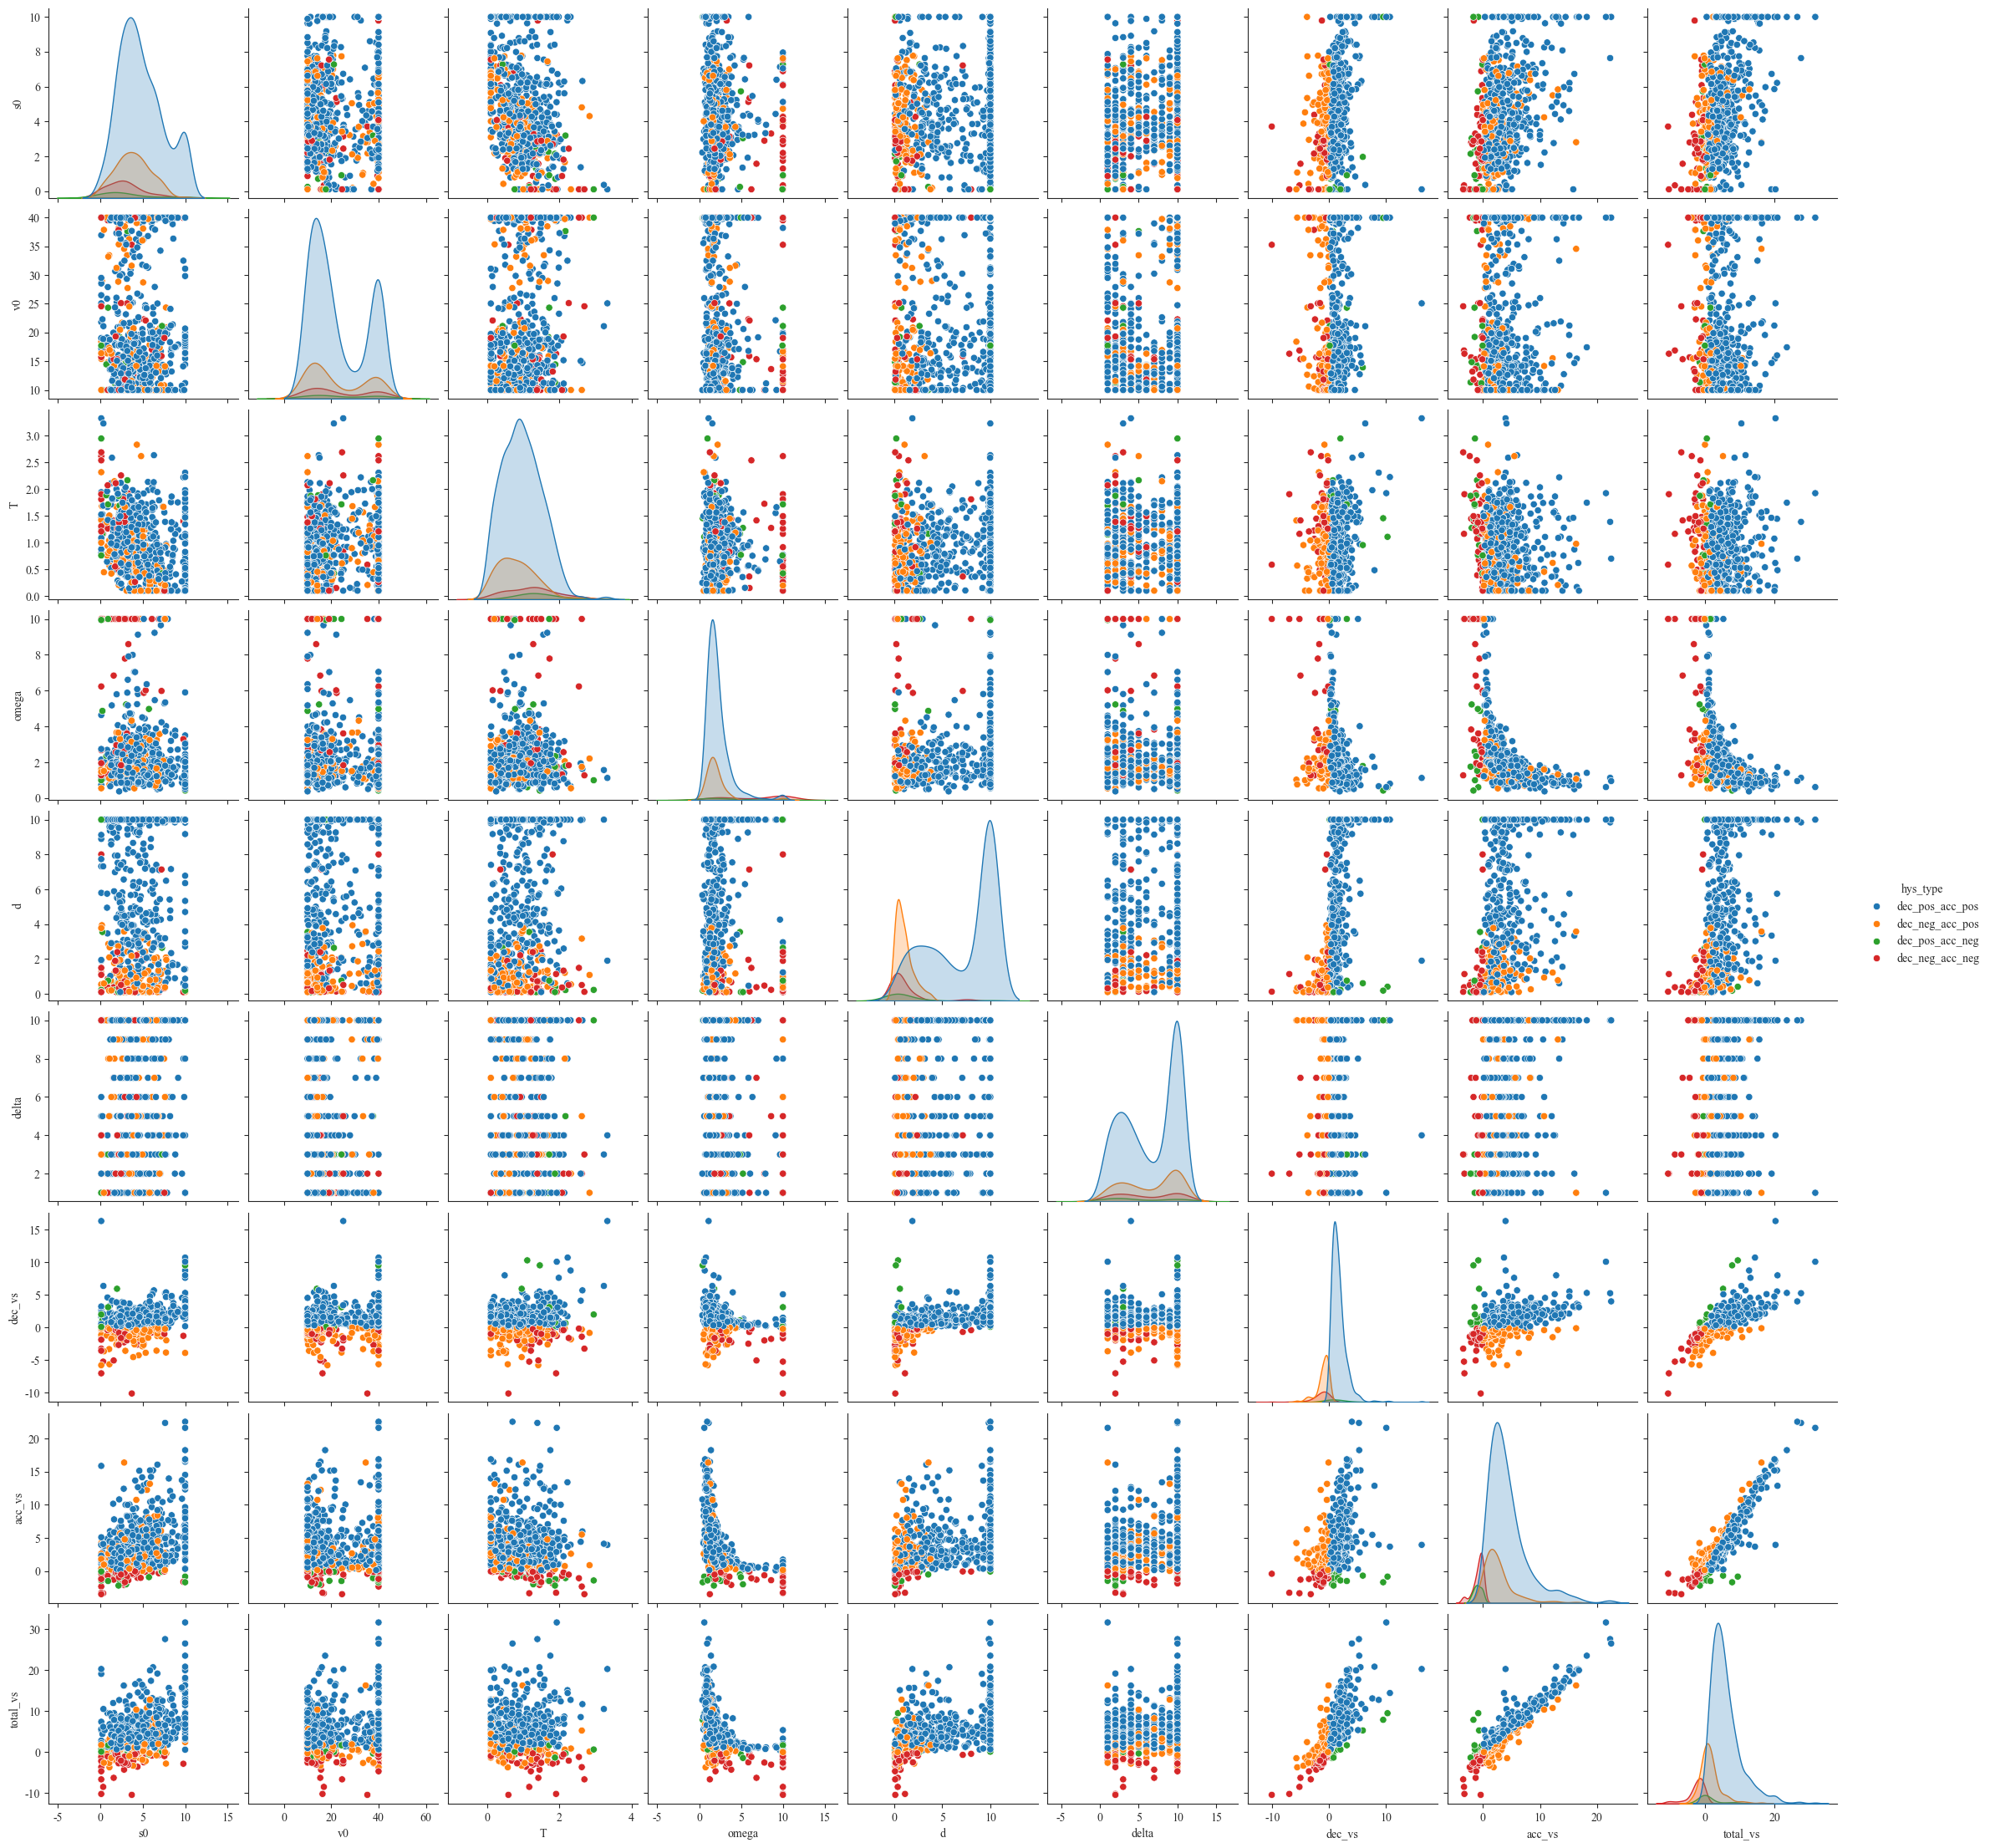

In [18]:
sns.pairplot(df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs", "hys_type"]], hue='hys_type')

# 迟滞贡献指数

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

In [8]:
data = df_param_merge[param_names]
data

,s0,v0,T,omega,d,delta
0,10.000000,40.000000,0.436868,0.548210,10.000000,10.0
1,7.737167,24.353724,0.476107,1.981402,2.087164,4.0
2,10.000000,40.000000,1.109293,0.605000,0.407477,10.0
3,6.811732,17.958565,0.733120,2.752649,10.000000,7.0
4,0.100000,17.043753,0.805630,1.015823,9.997592,6.0
...,...,...,...,...,...,...
685,5.767894,10.000000,0.379805,1.382309,9.999943,2.0
686,10.000000,40.000000,0.525731,0.771206,10.000000,10.0
687,5.596684,10.007324,0.590291,1.280191,3.240674,4.0
688,2.435371,25.120707,2.259007,1.832077,0.513617,2.0


In [39]:
target = np.zeros(len(df_param_merge), dtype=int)

target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
target[np.where((df_param_merge["dec_vs"] < 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1
target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] < 0))[0]] = 0
target[np.where((df_param_merge["dec_vs"] > 0) & (df_param_merge["acc_vs"] > 0))[0]] = 1

print("target:", np.unique(target, return_counts=True))
target

target: (array([0, 1]), array([ 62, 628], dtype=int64))


array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [24]:
def train(n, x_train, y_train, random_state=0):
    rfc: RandomForestClassifier = RandomForestClassifier(n_estimators=n, random_state=random_state)
    rfc.fit(x_train,y_train)
    return rfc

def test(rfc, x_test, y_test):
    return rfc.score(x_test, y_test)

In [12]:
# result = joblib.Parallel(n_jobs=-1)(joblib.delayed(train)(n, Xtrain, Ytrain) for n in range(2, 50))

In [13]:
# plt.plot(range(2, 50), [test(rfc, Xtest, Ytest) for rfc in result])
# plt.plot(range(2, 50), [test(rfc, Xtrain, Ytrain) for rfc in result])

In [41]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, target, test_size=0.3)
result = joblib.Parallel(n_jobs=-1)(joblib.delayed(train)(20, Xtrain, Ytrain, np.random.randint(0, 9999)) for _ in range(100))
score = [test(rfc, Xtest, Ytest) for rfc in result]
feature_importance = np.array([rfc.feature_importances_ for rfc in result])
print("mean score:", np.mean(score))
mean_importance = feature_importance.mean(axis=0)
pd.options.display.precision = 3
pd.DataFrame([*zip(param_names, mean_importance)]).T

mean score: 0.9483574879227054


,0,1,2,3,4,5
0,s0,v0,T,omega,d,delta
1,0.127,0.068,0.137,0.323,0.302,0.043


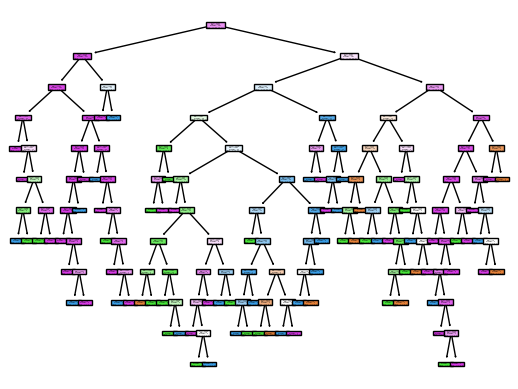

In [33]:
from sklearn.tree import plot_tree

plot_tree(result[0].estimators_[0], feature_names=param_names, filled=True)
plt.savefig(r"E:\PyProject\car-following-model-test\tests\data\type_param_tree" + f"_{cf_name}.svg")

## Spearman Correlation Coefficient

C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_13156\1434588774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"dec_vs": "VSM\n(dec)", "acc_vs": "VSM\n(acc)", "total_vs": "VSM\n(full)"}, inplace=True)
C:\Users\Enze Zhao\AppData\Local\Temp\ipykernel_13156\1434588774.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"s0": "$s_0$", "v0": "$v_0$", "T": "$T$", "omega": "$\omega$", "d": "$d$", "delta": "$\delta$"}, inplace=True)


                $s_0$     $v_0$       $T$  $\omega$       $d$  $\delta$  \
$s_0$        1.000000  0.082415 -0.368278 -0.060037  0.122631  0.181999   
$v_0$        0.082415  1.000000  0.057926 -0.065778  0.052364  0.366457   
$T$         -0.368278  0.057926  1.000000  0.019278  0.096782 -0.027212   
$\omega$    -0.060037 -0.065778  0.019278  1.000000  0.068221 -0.163594   
$d$          0.122631  0.052364  0.096782  0.068221  1.000000  0.094607   
$\delta$     0.181999  0.366457 -0.027212 -0.163594  0.094607  1.000000   
VSM\n(dec)   0.329405  0.114878  0.147485 -0.342506  0.614909  0.105973   
VSM\n(acc)   0.340787  0.003878 -0.099567 -0.621466  0.310619  0.142306   
VSM\n(full)  0.384550  0.050122 -0.015512 -0.568982  0.458746  0.131808   

             VSM\n(dec)  VSM\n(acc)  VSM\n(full)  
$s_0$          0.329405    0.340787     0.384550  
$v_0$          0.114878    0.003878     0.050122  
$T$            0.147485   -0.099567    -0.015512  
$\omega$      -0.342506   -0.621466    -0.568

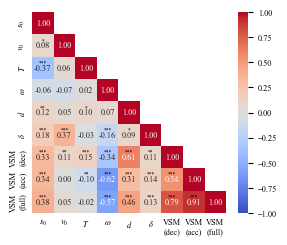

In [35]:
from scipy.stats import spearmanr
# 创建一个mask，隐藏上三角的非对角线部分
# mask = np.triu(np.ones_like(corr, dtype=bool))
df = df_param_merge[[*param_names, "dec_vs", "acc_vs", "total_vs"]]
df.rename(columns={"dec_vs": "VSM\n(dec)", "acc_vs": "VSM\n(acc)", "total_vs": "VSM\n(full)"}, inplace=True)
df.rename(columns={"s0": "$s_0$", "v0": "$v_0$", "T": "$T$", "omega": "$\omega$", "d": "$d$", "delta": "$\delta$"}, inplace=True)

sns.reset_defaults()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def cm2inch(x,y):
    return x/2.54,y/2.54

fontsize = 6  # 7磅/pt/point
mpl.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
        "font.family":'serif',
        "font.size": fontsize,
        "font.serif": ['Times New Roman'],
    }
)
fontdict = {'weight': 'bold','size':fontsize,'family':'SimHei'}

df_coor= df.corr(method="spearman") # 相关性结果
# df_coor = df.corr(method="pearson") # 相关性结果

mm = 1 / 25.4  # mm转inch
_width = 70 * mm  # 图片宽度英寸
_ratio = 6 / 7  # 图片长宽比
figsize = (_width, _width * _ratio)

fig = plt.figure(figsize=figsize)
ax1 = plt.gca()

print(df_coor)
#构造mask，去除重复数据显示
mask = np.zeros_like(df_coor)
mask[np.triu_indices_from(mask)] = True
mask2 = mask
mask = (np.flipud(mask)-1)*(-1)
mask = np.rot90(mask,k = -1)

# im1 = sns.heatmap(df_coor,annot=True,cmap="coolwarm"
#                   , mask=mask#构造mask，去除重复数据显示
#                   ,vmax=1,vmin=-1
#                   , fmt='.2f',ax = ax1)

ax1.tick_params(axis = 'both', length=0)


# #计算相关性显著性并显示
rlist = []
plist = []
df_np = df
print(df_np)
for i in df_np.columns:
    for j in df_np.columns:
        res = spearmanr(df_np[i], df_np[j])
        rlist.append(res.statistic)
        plist.append(res.pvalue)

rarr = np.asarray(rlist).reshape(df_coor.shape[0],df_coor.shape[0])
parr = np.asarray(plist).reshape(df_coor.shape[0],df_coor.shape[0])
xlist = ax1.get_xticks()
ylist = ax1.get_yticks()
print(xlist, ylist)

im1 = sns.heatmap(rarr,annot=True,cmap="coolwarm"
                  , mask=mask#构造mask，去除重复数据显示
                  ,vmax=1,vmin=-1
                  , fmt='.2f',ax = ax1)

ax1.set_xticklabels(df_coor.columns)
ax1.set_yticklabels(df_coor.columns)

widthx = 0
widthy = -0.15

for m in ax1.get_xticks():  # 行
    for n in ax1.get_yticks():  # 列
        # if int(m) == 0 and int(n) == 0:
        #     ax1.text(0, 1, '****',ha = 'center',color = 'k')
        # print([int(m),int(n)])
        pv = (parr[int(m),int(n)])
        # rv = (rarr[int(m),int(n)])
        if mask2[int(m),int(n)]<1.:
            # if abs(rv) > 0.5:
            #     if  pv< 0.05 and pv>= 0.01:
            #         ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'white')
            #     if  pv< 0.01 and pv>= 0.001:
            #         ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'white')
            #     if  pv< 0.001:
            #         print([int(m),int(n)])
            #         ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'white')
            # else:
            if  pv< 0.05 and pv>= 0.01:
                ax1.text(n+widthx,m+widthy,'*',ha = 'center',color = 'k', fontsize=fontsize - 2)
            elif  pv< 0.01 and pv>= 0.001:
                ax1.text(n+widthx,m+widthy,'**',ha = 'center',color = 'k', fontsize=fontsize - 2)
            elif  pv< 0.001:
                ax1.text(n+widthx,m+widthy,'***',ha = 'center',color = 'k', fontsize=fontsize - 2)

fig.subplots_adjust(wspace=0.5, bottom=0.1, top=0.95, right=0.98, left=0.10)
fig.savefig(r"E:\PyProject\car-following-model-test\tests\data\param_corr" + f"_{cf_name}.tif", dpi=500, pil_kwargs={"compression": "tiff_lzw"})
fig

In [13]:
df_param_merge["dec_vs"].hasnans

True

## Xgboost

In [26]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

# 切分训练集和测试集
train_x, test_x, train_y, test_y = train_test_split(data,target,test_size=0.2,random_state=7)

# xgboost模型初始化设置
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x)
watchlist = [(dtrain,'train')]

# booster:
params={'booster':'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth':5,
        'lambda':10,
        'subsample':0.75,
        'colsample_bytree':0.75,
        'min_child_weight':2,
        'eta': 0.025,
        'seed':0,
        'nthread':8,
        'gamma':0.15,
        'learning_rate' : 0.01}

# 建模与预测：50棵树
bst=xgb.train(params, dtrain, num_boost_round=50, evals=watchlist)
ypred=bst.predict(dtest)

# 设置阈值、评价指标
y_pred = (ypred >= 0.5)*1
print ('Precesion: %.4f' %metrics.precision_score(test_y,y_pred))
print ('Recall: %.4f' % metrics.recall_score(test_y,y_pred))
print ('F1-score: %.4f' %metrics.f1_score(test_y,y_pred))
print ('Accuracy: %.4f' % metrics.accuracy_score(test_y,y_pred))
print ('AUC: %.4f' % metrics.roc_auc_score(test_y,ypred))

ypred = bst.predict(dtest)
print("测试集每个样本的得分\n",ypred)
ypred_leaf = bst.predict(dtest, pred_leaf=True)
print("测试集每棵树所属的节点数\n",ypred_leaf)
ypred_contribs = bst.predict(dtest, pred_contribs=True)
print("特征的重要性\n",ypred_contribs )

xgb.plot_importance(bst,height=0.8,title='', ylabel='特征')
plt.rc('font', family='Arial Unicode MS', size=14)
plt.show()

XGBoostError: [15:37:56] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:144: label must be in [0,1] for logistic regression